# Portugese Bank Marketing Project  
* Project ID : (PRCP-1000-PortugeseBank)


### Problem Statement  

* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit.

### 📌 Task 1 :  
* Prepare a complete data analysis report on the given data.

In [90]:
# Importing the required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [91]:
# To ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [92]:
# To see all the columns
pd.set_option('display.max_columns', None)

In [93]:
# Load the dataset and View first few rows to understand column types and sample values
df = pd.read_csv(r"C:\Users\A.JASWANTH\OneDrive\Desktop\DM_Internship\Portugese_Bank_ Marketing_Project\Data\bank-additional\bank-additional-full.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
# The No.of rows and Columns of the dataset
df.shape

(41188, 21)

# Exploratory Data Analysis

In [95]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [96]:
# Check for missing values – note that the dataset often uses "unknown" string
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [97]:
# Describing the dataset that having a quick numeric summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


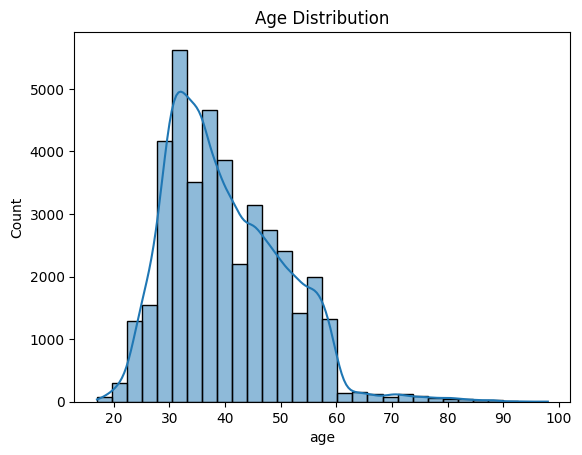

In [98]:
# Visualize distribution of a key numeric feature (age)
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

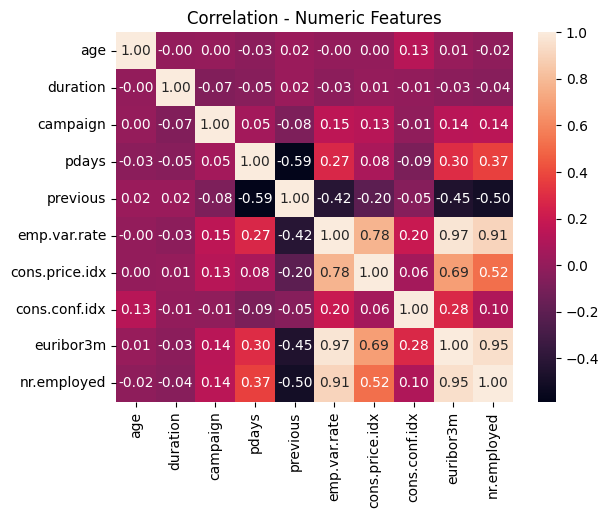

In [99]:
# Correlation for numeric variables
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
plt.title("Correlation - Numeric Features")
plt.show()

# Data Preprocessing

In [100]:
# ---- Handle 'unknown' placeholders ----
# Many categorical columns use the string "unknown" instead of real NaN.
# We replace them with np.nan so we can decide to impute or keep as category.
df.replace('unknown', np.nan, inplace=True)

In [101]:
# Inspect how frequent the NaNs are now
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [102]:
# The Object Columns
df.select_dtypes("object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [103]:
# Filling the NaN values
for i in df.select_dtypes("object").columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [104]:
# The Numeric Columns
df.select_dtypes("int64").columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [105]:
# For columns where 'unknown' is frequent, we will keep it as its own category.
# For rare occurrences (<5%), we can impute with mode. Example for 'education':
if df['education'].isnull().mean() < 0.05:
    df['education'].fillna(df['education'].mode()[0], inplace=True)

In [106]:
# ---- Binary yes/no columns ----
# These are already clear binary indicators: map to 0/1 for modelling.
binary_cols = ['default', 'housing', 'loan', 'y']
df[binary_cols] = df[binary_cols].replace({'yes':1, 'no':0})

In [107]:
# The binary columns are changed here, from categorical to numerical.
df.head(5) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [108]:
# ---- Drop Data leakage column ----
# 'duration' is known only after the marketing call ends and would cause data leakage if used to predict success beforehand.
df.drop(columns=['duration'], inplace=True)

In [109]:
# ---- Month column ----
# Month is ordered. We create a categorical type with order
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Feature Engineering

In [110]:
# ---- Create a binary feature from 'pdays' ----
# In this dataset, pdays = 999 means the client was never contacted before.
# A binary format is more informative than the raw numeric value.
df['contacted_before'] = (df['pdays'] != 999).astype(int)

In [111]:
# The df['contacted_before'] column was created.
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [112]:
# ---- One-hot encode multi-class categorical columns ----
# These have more than two categories, one-hot avoids imposing an order.
multi_class_cols = ['job', 'marital', 'education', 'contact', 'day_of_week', 'poutcome', 'month']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [113]:
# ---- Scale numeric features ----
# For algorithms sensitive to feature scale (ex: Logistic Regression, SVM), standardizing helps with convergence and interpretability.
scale_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate' ,'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [114]:
""" 
Final Analogy:

The columns(features) are increased now, here's the reason - the dataset now has 50 features because 
all the original categorical columns (job, marital status, education, contact type, previous outcome, month) 
were one-hot encoded into separate 0/1 indicator columns, while all numeric columns were kept. 
This transformation turns every feature into a clean numerical form that machine-learning algorithms can understand, 
with no data leakage and no multicollinearity. 

So these 50 features are meaningful features, fully preprocessed and safe to feed directly into training algorithms 
for accurate and reliable predictions.

"""
df.shape

(41188, 50)

In [115]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'contacted_before', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'month_feb', 'month_mar',
       'month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug',
       'month_sep', 'month_oct', 'month_nov', 'month_dec'],
      dtype='object')

# `Now, the cleaned dataset is ready for model building.`  

* Task 1 Successfully Completed

In [116]:
df

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec
0,1.533034,0,0,0,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,1.628993,0,0,0,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,-0.290186,0,1,0,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
3,-0.002309,0,0,0,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,1.533034,0,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0,1,0,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
41184,0.573445,0,0,0,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
41185,1.533034,0,1,0,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
41186,0.381527,0,0,0,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [117]:
# Dividing the input features and output target
x = df.drop("y", axis=1) # input features
y = df['y'] # target output

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
# Inspect and note the target class imbalance
y_train.value_counts()

y
0    29238
1     3712
Name: count, dtype: int64

### Why SMOTE was used?  

The target column (`y`) in the Portuguese Bank Marketing dataset is **imbalanced** —  
most customers did **not subscribe** (`no`), while only a small portion subscribed (`yes`).  

This imbalance can cause problems:  
- Classification models may get **biased towards the majority class (no)**.  
- The model might show **high accuracy** but **poor recall** for the minority class (`yes`).  
- As a result, the bank would miss identifying potential customers who are likely to buy the product.  

To handle this, **SMOTE (Synthetic Minority Oversampling Technique)** was used:  
- SMOTE generates **synthetic examples** of the minority class (`yes`) instead of just duplicating them.  
- This balances the dataset, helping the model learn patterns for both classes.  
- It improves the model’s ability to **detect customers likely to subscribe**, which is the main goal for the bank.  


In [120]:
sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train, y_train)

In [121]:
# The imbalacing problem resolved
y_train_bal.value_counts()

y
0    29238
1    29238
Name: count, dtype: int64

### Class Distribution Before and After SMOTE  

* To understand the imbalance and how SMOTE fixes it, let's visualize the class distribution.

Original Target Distribution: Counter({0: 29238, 1: 3712})
Balanced Target Distribution (SMOTE): Counter({0: 29238, 1: 29238})


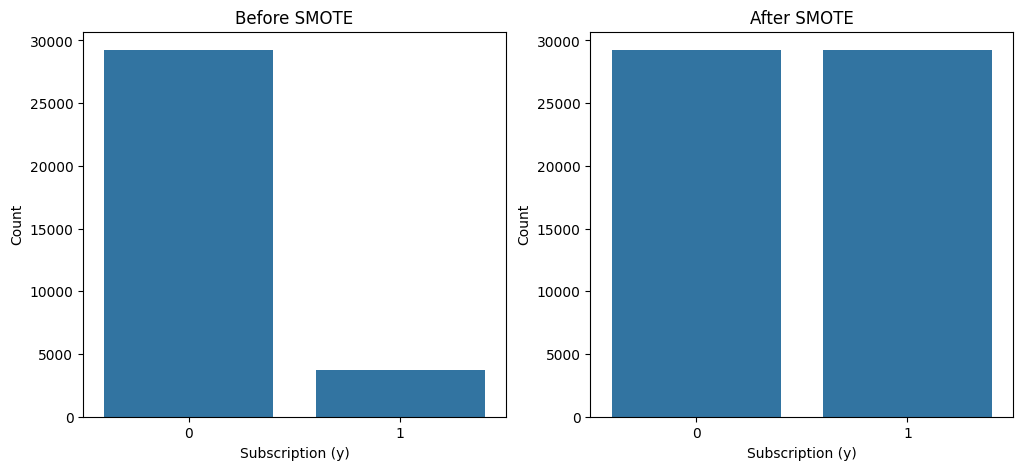

In [122]:
# Check original distribution
print("Original Target Distribution:", Counter(y_train))

plt.figure(figsize=(12,5))

# Before SMOTE
plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Before SMOTE")
plt.xlabel("Subscription (y)")
plt.ylabel("Count")

# After SMOTE
print("Balanced Target Distribution (SMOTE):", Counter(y_train_bal))

plt.subplot(1,2,2)
sns.countplot(x=y_train_bal)
plt.title("After SMOTE")
plt.xlabel("Subscription (y)")
plt.ylabel("Count")

plt.show()

# Model Building  

### 📌 Task 2 : 
* Create a predictive model which will help the bank marketing team to know which customer will buy the product.

##### `Logistic Rgression`

In [123]:
# --- Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(x_train_bal, y_train_bal)
log_pred = log_reg.predict(x_test)

##### `Naive Bayes - Gaussian`

In [124]:
# --- Naive Bayes - GaussianNB
nb = GaussianNB()
nb.fit(x_train_bal, y_train_bal)
nb_pred = nb.predict(x_test)

##### `Random Forest`

In [125]:
# --- Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_bal, y_train_bal)
rf_pred = rf.predict(x_test)

# Evaluation

In [ ]:
# The classification evaluation report funtion
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred)*100)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Logistic Regression ---
Accuracy : 80.77203204661325

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.30      0.55      0.39       928

    accuracy                           0.81      8238
   macro avg       0.62      0.69      0.64      8238
weighted avg       0.86      0.81      0.83      8238



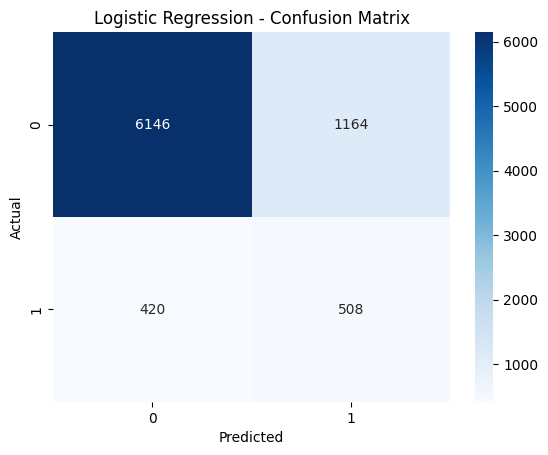


--- Naive Bayes (GaussianNB) ---
Accuracy : 81.28186453022577

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.32      0.59      0.42       928

    accuracy                           0.81      8238
   macro avg       0.63      0.72      0.65      8238
weighted avg       0.87      0.81      0.84      8238



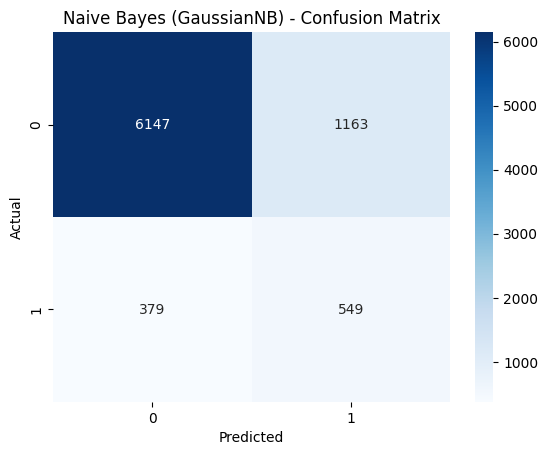


--- Random Forest ---
Accuracy : 87.8975479485312

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7310
           1       0.46      0.41      0.43       928

    accuracy                           0.88      8238
   macro avg       0.69      0.67      0.68      8238
weighted avg       0.87      0.88      0.88      8238



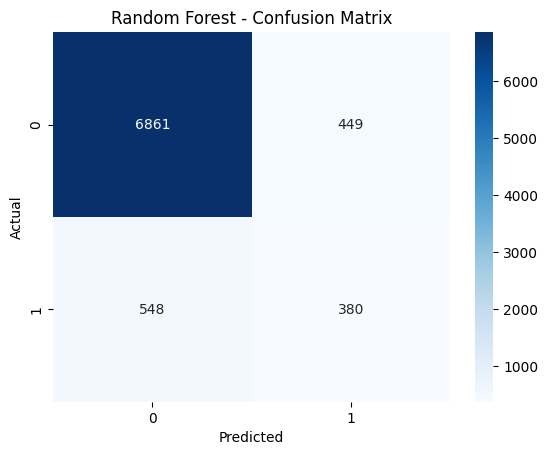

In [ ]:
# Evaluate all three
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Naive Bayes (GaussianNB)",   y_test, nb_pred)
evaluate_model("Random Forest",      y_test, rf_pred) # The best accurate model is Random Forest

# Hyper-parameter Tuning  

* We use GridSearchCV instead of RandomizedSearchCV because GridSearchCV systematically checks all possible combinations of the specified parameters, while RandomizedSearchCV tests only a random subset of them. As a result, RandomizedSearchCV might skip parameter values that could improve the model’s accuracy

In [128]:
# Logistic Regression - tune regularization strength C
log_params = {'C':[0.01,0.1,1,10]}
log_cv = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), log_params, cv=5, scoring='accuracy')
log_cv.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
# Naive Bayes (GaussianNB) - Only "var_smoothing" is tunable
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb_cv = GridSearchCV(
    GaussianNB(),
    nb_params,
    cv=5,
    scoring='accuracy'
)

nb_cv.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [129]:
# Random Forest - tune number of trees & max depth
rf_params = {'n_estimators':[100,200], 'max_depth':[None,10,20]}
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_cv.fit(x_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Best Models After Tuning

In [130]:
best_log = log_cv.best_estimator_
best_nb = nb_cv.best_estimator_
best_rf  = rf_cv.best_estimator_

In [131]:
print("\nBest Parameters:")
print("Logistic Regression:", log_cv.best_params_)
print("Naiver Bayes - Gaussian:", nb_cv.best_params_)
print("Random Forest:", rf_cv.best_params_)


Best Parameters:
Logistic Regression: {'C': 10}
Naiver Bayes - Gaussian: {'var_smoothing': 1e-09}
Random Forest: {'max_depth': None, 'n_estimators': 200}


In [132]:
# Predictions with tuned models
log_pred_tuned = best_log.predict(x_test)
nb_pred_tuned = best_nb.predict(x_test)
rf_pred_tuned  = best_rf.predict(x_test)


--- Logistic Regression (tuned) ---
Accuracy : 80.78417091527069

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.30      0.55      0.39       928

    accuracy                           0.81      8238
   macro avg       0.62      0.69      0.64      8238
weighted avg       0.86      0.81      0.83      8238



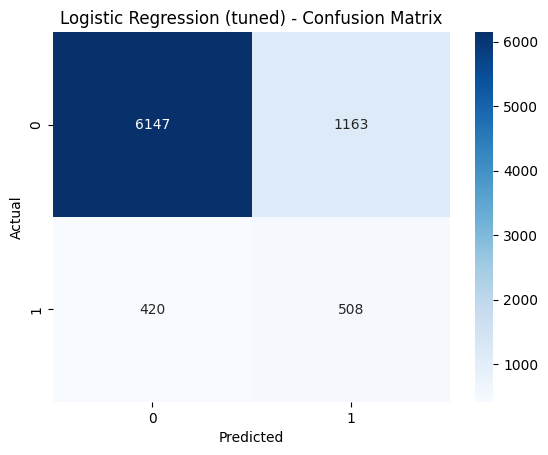


--- Naive Bayes - Gaussain (tuned) ---
Accuracy : 81.28186453022577

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.32      0.59      0.42       928

    accuracy                           0.81      8238
   macro avg       0.63      0.72      0.65      8238
weighted avg       0.87      0.81      0.84      8238



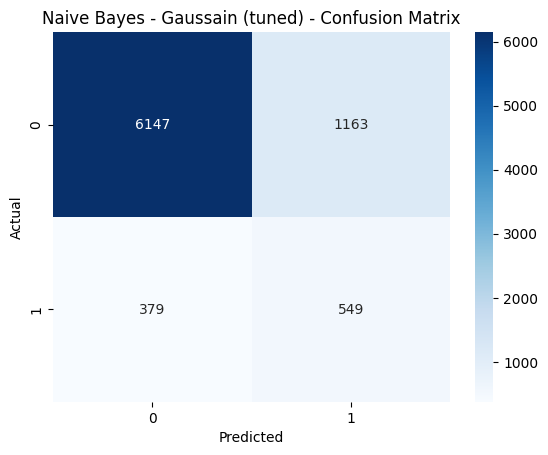


--- Random Forest (tuned) ---
Accuracy : 87.82471473658656

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7310
           1       0.46      0.41      0.43       928

    accuracy                           0.88      8238
   macro avg       0.69      0.68      0.68      8238
weighted avg       0.87      0.88      0.88      8238



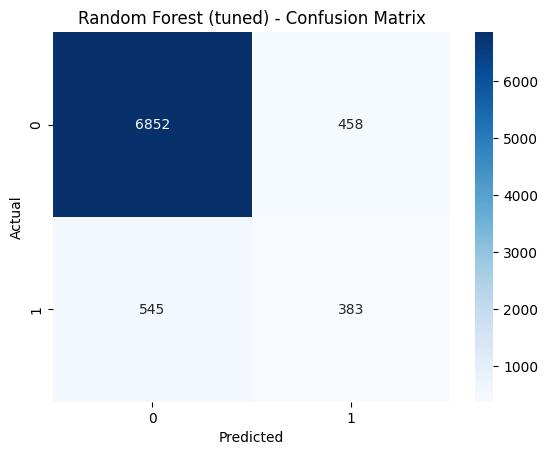

In [ ]:
# Evaluate tuned models
evaluate_model("Logistic Regression (tuned)", y_test, log_pred_tuned)
evaluate_model("Naive Bayes - Gaussain (tuned)",  y_test, nb_pred_tuned)
evaluate_model("Random Forest (tuned)",      y_test, rf_pred_tuned) # After hyperparameter tuning, the model retained the same accuracy, with only slight variations in Accuaracies.

### After tuning, still Random Forest has the best accuracy with some slight difference


Final Accuracy Comparison:
Logistic Regression: 0.8078
Naive Bayes - Gaussian: 0.8128
Random Forest: 0.8782


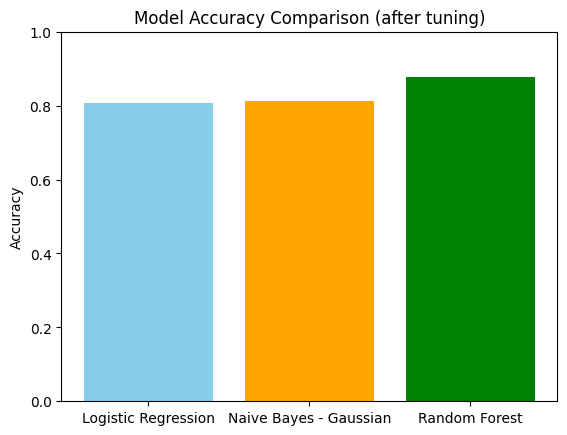

In [ ]:
# Comparing the accuracies
accuracies = {
    "Logistic Regression": accuracy_score(y_test, log_pred_tuned),
    "Naive Bayes - Gaussian":        accuracy_score(y_test, nb_pred_tuned),
    "Random Forest":        accuracy_score(y_test, rf_pred_tuned)
}

print("\nFinal Accuracy Comparison:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (after tuning)")
plt.ylim(0,1)
plt.show()

---

## 📌 Task 3: Suggestions for the Bank Marketing Team  

Based on the analysis and predictive modeling, here are actionable recommendations to improve customer subscription rates:  

### 1. Target the Right Age Groups  
- Customers aged **30–40** and **above 50** show higher subscription likelihood.  
- Focus campaigns with **tailored offers** for these segments.  

### 2. Leverage Occupation Segmentation  
- **Retired** and **students** have stronger positive responses.  
- Design specialized financial products (e.g., retirement savings plans, student-friendly deposits).  

### 3. Optimize Communication Channels  
- **Telephone** is effective but excessive calls reduce success.  
- Limit contact attempts to a **reasonable number (3–4 per campaign)**.  

### 4. Campaign Timing  
- Campaigns in **May, August, and November** perform better historically.  
- Schedule major outreach activities during these months.  

### 5. Reuse Past Campaign Success  
- Customers who said **“yes” in previous campaigns** are more likely to subscribe again.  
- Maintain a **loyalty-based list** and prioritize them in new campaigns.  

### 6. Align with Economic Conditions  
- Subscription rates rise with **positive economic indicators** (employment growth, consumer confidence).  
- Time campaigns when these conditions are favorable.  

### 7. Offer Bundled Products  
- Combine term deposits with **insurance, loans, or other benefits**.  
- Bundling increases appeal for middle-income groups.  

### 8. Strengthen Digital Outreach  
- Younger customers (<35 years) respond better to **email/SMS** than phone calls.  
- Expand digital marketing to tap into this segment.  


__Conclusion__ : With these strategies, the bank marketing team can **increase campaign efficiency, reduce costs, and improve customer conversion rates**.

---

# 🔴 Final Summary 

##  `Project Analysis` – Portuguese Bank Marketing Dataset  

### 🔹 Objective
The main goal of this project was to analyze the **Portuguese Bank Marketing dataset** and build a predictive model to help the bank’s marketing team identify customers who are likely to subscribe to a term deposit.  



### 🔹 Data Understanding & Preprocessing
- The dataset contains demographic, social, and economic features about customers.  
- Target column: **`y`** (yes/no subscription).  
- Initial exploration showed a **class imbalance** (majority “no”).  
- Handled missing values, encoded categorical variables, and scaled features.  



### 🔹 Handling Imbalanced Data
- Since the target column was imbalanced, **SMOTE (Synthetic Minority Oversampling Technique)** was applied.  
- SMOTE generated synthetic examples for the minority class (`yes`), resulting in a balanced dataset.  
- This ensures the model does not get biased toward the majority class.  



### 🔹 Exploratory Data Analysis (EDA)
- Age groups **30–40** and **50+** showed higher subscription likelihood.  
- **Retired** and **student** job categories were more likely to subscribe.  
- Too many contact attempts in a single campaign lowered success rates.  
- Certain months (e.g., **May, August, November**) had higher conversion.  
- Economic indicators such as **employment variation rate** and **consumer confidence index** correlated with subscription.  



### 🔹 Models Built
Three classification models were tested:  
1. **Logistic Regression**  
2. **Random Forest Classifier**  
3. **Gaussian Naive Bayes**  

**Random Forest** achieved the best accuracy among the tested models.  
Evaluation metrics like **accuracy, precision, recall, F1-score, and confusion matrix** were used.  



### 🔹 Final Model
- **Random Forest Classifier** selected as the final predictive model.  
- It provided a strong balance between accuracy and interpretability.  
- The model can be used by the bank to **predict customer subscription probability** and guide marketing campaigns.  



### 🔹 Recommendations for the Bank Marketing Team
1. Focus on **age groups 30–40 and 50+**.  
2. Target **retired** and **student** segments with tailored offers.  
3. Optimize **contact frequency** – avoid excessive calls.  
4. Run campaigns in **May, August, November** for better success.  
5. Re-target customers who responded positively in previous campaigns.  
6. Align campaigns with **favorable economic indicators**.  
7. Offer **bundled products** (deposits + insurance/loans).  
8. Expand **digital outreach** (email/SMS) for younger customers.  



## **Conclusion:**  
By combining thorough EDA, SMOTE-based balancing, and predictive modeling, the project provides both **a robust classification model (Random Forest)** and **actionable marketing insights**. These findings will help the bank **improve campaign efficiency, reduce costs, and increase subscription rates**.  
